## Etapa 1 ‚Äî Explora√ß√£o Inicial dos Dados

Nesta se√ß√£o, o objetivo √© **conhecer e avaliar a base de dados** utilizada no case.  
Vamos:
- Importar as principais bibliotecas (Pandas, Numpy, Matplotlib, Seaborn);
- Carregar o dataset `habitos_e_desempenho_estudantil.csv`;
- Examinar suas dimens√µes, tipos de dados e estat√≠sticas descritivas;
- Identificar valores ausentes, duplicados e poss√≠veis inconsist√™ncias;
- Observar as distribui√ß√µes das principais vari√°veis (como notas, horas de estudo e uso de redes sociais).

> Esta etapa fornece o **diagn√≥stico inicial da qualidade dos dados**, que guiar√° os tratamentos e an√°lises posteriores.

In [ ]:
# Importa√ß√£o das bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from scipy import stats

# Configura√ß√µes visuais
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", None)

# Caminho do dataset (ajuste conforme necess√°rio)
path = "data/habitos_e_desempenho_estudantil.csv"


In [45]:
# Leitura do dataset
df = pd.read_csv(path)

# Exibir as 5 primeiras linhas
df.head()

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

In [46]:
# Dimens√µes e tipos das colunas
print("Dimens√µes do dataset:", df.shape)
print("\nInforma√ß√µes gerais:")
print(df.info())

# Estat√≠sticas descritivas (num√©ricas)
print("\nEstat√≠sticas descritivas (vari√°veis num√©ricas):")
display(df.describe().T)

# Estat√≠sticas descritivas (categ√≥ricas)
print("\nValores √∫nicos em vari√°veis categ√≥ricas:")
display(df.select_dtypes(include="object").nunique())

Dimens√µes do dataset: (1000, 16)

Informa√ß√µes gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    objec

count     mean        std   min     25%   50%     75%  \
age                    1000.0  20.4980   2.308100  17.0  18.750  20.0  23.000   
study_hours_per_day    1000.0   3.5501   1.468890   0.0   2.600   3.5   4.500   
social_media_hours     1000.0   2.5055   1.172422   0.0   1.700   2.5   3.300   
netflix_hours          1000.0   1.8197   1.075118   0.0   1.000   1.8   2.525   
attendance_percentage  1000.0  84.1317   9.399246  56.0  78.000  84.4  91.025   
sleep_hours            1000.0   6.4701   1.226377   3.2   5.600   6.5   7.300   
exercise_frequency     1000.0   3.0420   2.025423   0.0   1.000   3.0   5.000   
mental_health_rating   1000.0   5.4380   2.847501   1.0   3.000   5.0   8.000   
exam_score             1000.0  69.6015  16.888564  18.4  58.475  70.5  81.325   

                         max  
age                     24.0  
study_hours_per_day      8.3  
social_media_hours       7.2  
netflix_hours            5.4  
attendance_percentage  100.0  
sleep_hours             10.0  
exercise_frequency       6.0  
mental_health_rating    10.0  
exam_score             100.0


Valores √∫nicos em vari√°veis categ√≥ricas:


student_id                       1000
gender                              3
part_time_job                       2
diet_quality                        3
parental_education_level            3
internet_quality                    3
extracurricular_participation       2
dtype: int64

In [47]:
# Contagem de valores ausentes
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({"Faltantes": missing, "%": missing_percent})

print("Valores ausentes por coluna:\n")
display(missing_table[missing_table["Faltantes"] > 0])

# Verifica√ß√£o de duplicatas
duplicadas = df.duplicated().sum()
print(f"\nTotal de linhas duplicadas: {duplicadas}")


Valores ausentes por coluna:



Faltantes    %
parental_education_level         91  9.1


Total de linhas duplicadas: 0


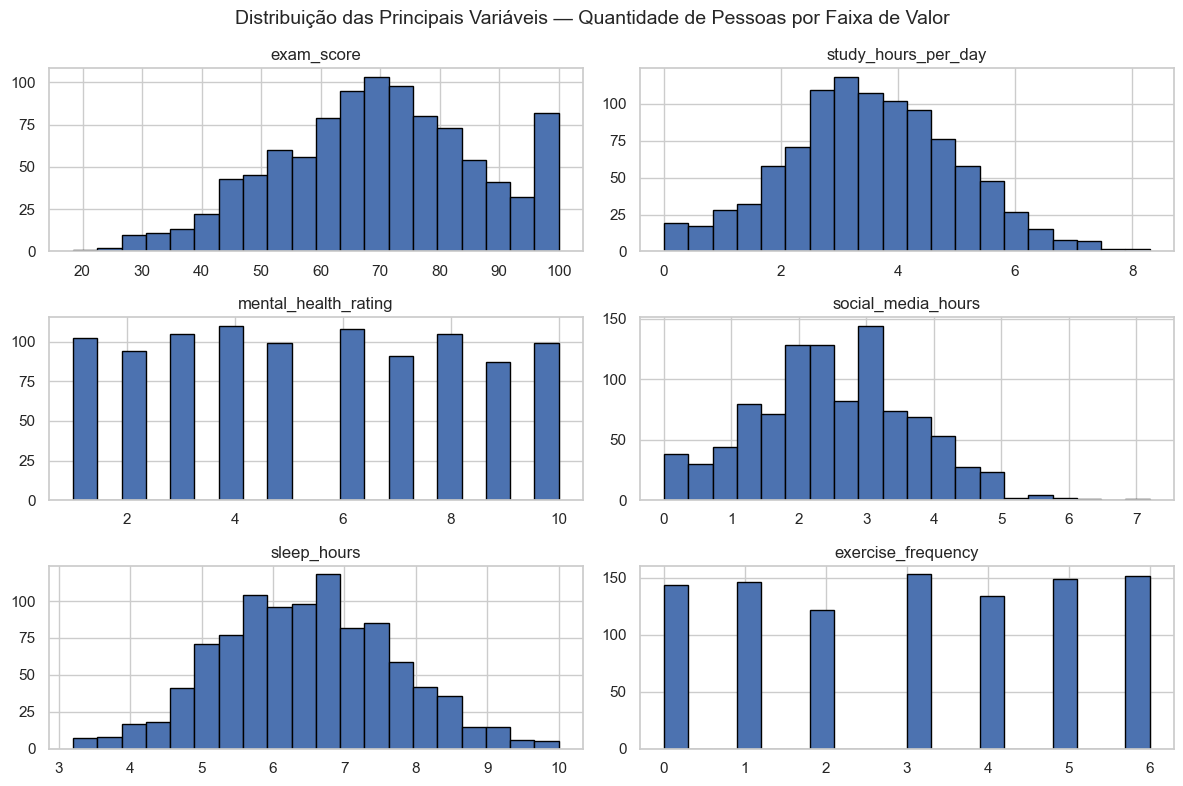

In [48]:
# Selecionar as vari√°veis de interesse com os nomes corretos do dataset
variaveis_chave = [
    "exam_score",               # Nota do estudante
    "study_hours_per_day",      # Horas de estudo por dia
    "mental_health_rating",     # Avalia√ß√£o de sa√∫de mental
    "social_media_hours",       # Tempo gasto em redes sociais
    "sleep_hours",              # Horas de sono por noite
    "exercise_frequency"        # Frequ√™ncia de exerc√≠cios
]

# Criar histogramas para analisar as distribui√ß√µes
df[variaveis_chave].hist(
    bins=20,
    figsize=(12, 8),
    color="#4C72B0",
    edgecolor="black"
)

plt.suptitle(
    "Distribui√ß√£o das Principais Vari√°veis ‚Äî Quantidade de Pessoas por Faixa de Valor",
    fontsize=14
)
plt.tight_layout()
plt.show()


## Etapa 2 ‚Äî Engenharia e Prepara√ß√£o dos Dados

Nesta etapa, o foco √© **tratar valores ausentes, padronizar tipos de dados** e **criar vari√°veis derivadas** que ajudar√£o nas an√°lises das hip√≥teses.  
As principais transforma√ß√µes incluem:

- Tratamento da vari√°vel `parental_education_level` (9% ausentes);
- Cria√ß√£o de **indicadores bin√°rios e ordinais** (`works_flag`, `parents_education_ord`);
- Constru√ß√£o de vari√°veis de **faixas** (buckets) para facilitar compara√ß√µes;
- Cria√ß√£o do **`lifestyle_index`**, um √≠ndice composto baseado em sono, dieta e exerc√≠cios;
- Revis√£o final da estrutura da base com checagens de consist√™ncia.

> Essa etapa √© essencial para garantir que todos os dados estejam limpos e prontos para an√°lises estat√≠sticas confi√°veis.

In [49]:
# Verifica√ß√£o r√°pida da coluna com ausentes
df["parental_education_level"].value_counts(dropna=False)

parental_education_level
High School    392
Bachelor       350
Master         167
NaN             91
Name: count, dtype: int64

In [50]:
# 1) Padronizar strings e garantir a categoria para ausentes
df["parental_education_level"] = (
    df["parental_education_level"]
    .astype(str).str.strip()
    .replace({"Bachelors": "Bachelor", "Masters": "Master"})  # se existirem varia√ß√µes
)
df["parental_education_level"] = df["parental_education_level"].replace({"nan": "Not Informed"})
df["parental_education_level"] = df["parental_education_level"].fillna("Not Informed")

print("Valores √∫nicos padronizados:", df["parental_education_level"].unique())

# 2) Mapping ORDENADO com as categorias que voc√™ de fato tem
mapping = {
    "High School": 2,
    "Bachelor": 3,
    "Master": 4,
    "Not Informed": 0
}

# 3) Mapear e checar NaN
df["parents_education_ord"] = df["parental_education_level"].map(mapping).astype(float)
print("NaN ap√≥s map:", df["parents_education_ord"].isna().sum())

# 4) Seguran√ßa extra: se ainda sobrar algo n√£o mapeado, p√µe 0 (ou remova as linhas)
df["parents_education_ord"] = df["parents_education_ord"].fillna(0)

Valores √∫nicos padronizados: ['Master' 'High School' 'Bachelor' 'Not Informed']
NaN ap√≥s map: 0


In [51]:
# Converter coluna de emprego em meio per√≠odo (Yes/No) para formato num√©rico 0/1
df["part_time_job_flag"] = df["part_time_job"].apply(
    lambda x: 1 if str(x).strip().lower() in ["yes", "sim", "true", "1"] else 0
)


# Criar buckets de horas de estudo
df["study_hours_bucket"] = pd.cut(
    df["study_hours_per_day"],
    bins=[0, 1, 2, 4, 6, 10],
    labels=["0‚Äì1h", "1‚Äì2h", "2‚Äì4h", "4‚Äì6h", "6h+"],
    include_lowest=True
)

# Criar buckets de uso de redes sociais
df["social_media_bucket"] = pd.cut(
    df["social_media_hours"],
    bins=[0, 1, 2, 3, 5, 10],
    labels=["0‚Äì1h", "1‚Äì2h", "2‚Äì3h", "3‚Äì5h", "5h+"],
    include_lowest=True
)


In [52]:
# --- Padronizar os valores de dieta em formato num√©rico ---
# Se 'diet_quality' √© categ√≥rica (ex: 'Poor', 'Fair', 'Good'), mapeamos:
if df["diet_quality"].dtype == "object":
    mapa_dieta = {"Poor": 1, "Fair": 2, "Good": 3}
    df["diet_quality_num"] = df["diet_quality"].map(mapa_dieta)
else:
    # Caso j√° seja num√©rica, s√≥ copia para manter consist√™ncia
    df["diet_quality_num"] = df["diet_quality"]

# --- Selecionar as vari√°veis do √≠ndice ---
lifestyle_vars = ["sleep_hours", "diet_quality_num", "exercise_frequency"]

# --- Tratar valores ausentes ---
df[lifestyle_vars] = df[lifestyle_vars].apply(pd.to_numeric, errors="coerce")  # garante tipo num√©rico
df[lifestyle_vars] = df[lifestyle_vars].fillna(df[lifestyle_vars].median())

# --- Normalizar para escala 0‚Äì100 ---
scaler = MinMaxScaler(feature_range=(0, 100))
df_norm = pd.DataFrame(scaler.fit_transform(df[lifestyle_vars]), columns=lifestyle_vars)

# --- Calcular o √≠ndice ponderado ---
df["lifestyle_index"] = (
    0.4 * df_norm["sleep_hours"] +
    0.3 * df_norm["diet_quality_num"] +
    0.3 * df_norm["exercise_frequency"]
)

# --- Conferir ---
df[["sleep_hours", "diet_quality", "exercise_frequency", "lifestyle_index"]].head()



sleep_hours diet_quality  exercise_frequency  lifestyle_index
0          8.0         Fair                   6        73.235294
1          4.6         Good                   6        68.235294
2          8.0         Poor                   1        33.235294
3          9.2         Poor                   4        55.294118
4          4.9         Fair                   3        40.000000

### C√°lculo do `lifestyle_index`

O **`lifestyle_index`** foi criado para representar, de forma num√©rica e compar√°vel, o qu√£o equilibrado √© o estilo de vida de cada estudante ‚Äî considerando seus h√°bitos de **sono**, **alimenta√ß√£o** e **atividade f√≠sica**.

#### Vari√°veis utilizadas:
| Fator | Coluna base | Interpreta√ß√£o | Peso |
|--------|--------------|----------------|------|
| Sono | `sleep_hours` | Mais horas de sono ‚Üí melhor equil√≠brio f√≠sico e cognitivo | 40% |
| Dieta | `diet_quality` (convertida para valores num√©ricos: Poor = 1, Fair = 2, Good = 3) | Melhor qualidade da dieta ‚Üí melhor sa√∫de geral | 30% |
| Exerc√≠cio | `exercise_frequency` | Maior frequ√™ncia ‚Üí melhor disposi√ß√£o e bem-estar | 30% |

#### Etapas do c√°lculo:

1. **Convers√£o num√©rica:**  
   A vari√°vel `diet_quality` foi mapeada para n√∫meros (1‚Äì3) para permitir c√°lculos quantitativos.

2. **Normaliza√ß√£o (0 ‚Äì 100):**  
   Cada vari√°vel foi normalizada usando o *Min-Max Scaler* para padronizar escalas diferentes (ex.: horas de sono variam de 0 a 10, enquanto dieta vai de 1 a 3).  
   \[
   X_{norm} = 100 \times \frac{X - X_{min}}{X_{max} - X_{min}}
   \]

3. **C√°lculo ponderado:**  
   Os fatores foram combinados aplicando pesos que refletem sua import√¢ncia relativa:
   \[
   \text{lifestyle\_index} = 0{,}4 \times \text{Sono} + 0{,}3 \times \text{Dieta} + 0{,}3 \times \text{Exerc√≠cio}
   \]

#### Interpreta√ß√£o do √≠ndice:
| Faixa | Interpreta√ß√£o |
|--------|----------------|
| **0 ‚Äì 40** | Estilo de vida abaixo do ideal (h√°bitos pouco equilibrados) |
| **40 ‚Äì 70** | Estilo de vida moderado (h√°bitos razo√°veis, mas com espa√ßo para melhoria) |
| **70 ‚Äì 100** | Estilo de vida saud√°vel e equilibrado |

> **Em resumo:** quanto mais pr√≥ximo de 100 for o `lifestyle_index`, mais saud√°veis e consistentes s√£o os h√°bitos di√°rios do estudante.  
Esse √≠ndice ser√° utilizado nas pr√≥ximas an√°lises para verificar sua rela√ß√£o com **desempenho acad√™mico (`exam_score`)** e **sa√∫de mental (`mental_health_rating`)**.


In [53]:
# Estrutura final e tipos de dados
print("\n Estrutura final do DataFrame:")
print(df.info())

# Visualizar primeiras linhas com as novas vari√°veis criadas
df.head()


 Estrutura final do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   student_id                     1000 non-null   object  
 1   age                            1000 non-null   int64   
 2   gender                         1000 non-null   object  
 3   study_hours_per_day            1000 non-null   float64 
 4   social_media_hours             1000 non-null   float64 
 5   netflix_hours                  1000 non-null   float64 
 6   part_time_job                  1000 non-null   object  
 7   attendance_percentage          1000 non-null   float64 
 8   sleep_hours                    1000 non-null   float64 
 9   diet_quality                   1000 non-null   object  
 10  exercise_frequency             1000 non-null   int64   
 11  parental_education_level       1000 non-null   object  
 12  int

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  \
0                     8                           Yes        56.2   
1                     8                            No       100.0   
2                     1                            No        34.3   
3                     1                           Yes        26.8   
4                     1                            No        66.4   

   parents_education_ord  part_time_job_flag study_hours_bucket  \
0                    4.0                   0               0‚Äì1h   
1                    2.0                   0                6h+   
2                    2.0                   0               1‚Äì2h   
3                    4.0                   0               0‚Äì1h   
4                    4.0                   0               4‚Äì6h   

  social_media_bucket  diet_quality_num  lifestyle_index  
0                1‚Äì2h                 2        73.235294  
1                2‚Äì3h                 3        68.235294  
2                3‚Äì5h                 1        33.235294  
3                3‚Äì5h                 1        55.294118  
4                3‚Äì5h                 2        40.000000

## Etapa 3 ‚Äî An√°lise Estat√≠stica e Explora√ß√£o de Hip√≥teses

Agora que os dados est√£o tratados e padronizados, iniciaremos a **an√°lise estat√≠stica** com base nas hip√≥teses definidas.

Cada hip√≥tese ser√° testada de forma **individual**, utilizando:
- Estat√≠sticas descritivas;
- Testes de correla√ß√£o ou regress√£o;
- Visualiza√ß√µes (boxplots, scatterplots, mapas de calor);
- Conclus√µes objetivas sobre confirma√ß√£o ou refuta√ß√£o.


### Hip√≥tese 1 ‚Äî "Quem mais estuda tira as melhores notas"

**Objetivo:** verificar se h√° uma rela√ß√£o positiva entre o tempo di√°rio de estudo (`study_hours_per_day`) e o desempenho acad√™mico (`exam_score`).

**Expectativa te√≥rica:** quanto maior o n√∫mero de horas de estudo, maior deve ser a nota m√©dia.

Correla√ß√£o entre horas de estudo e nota: 0.825


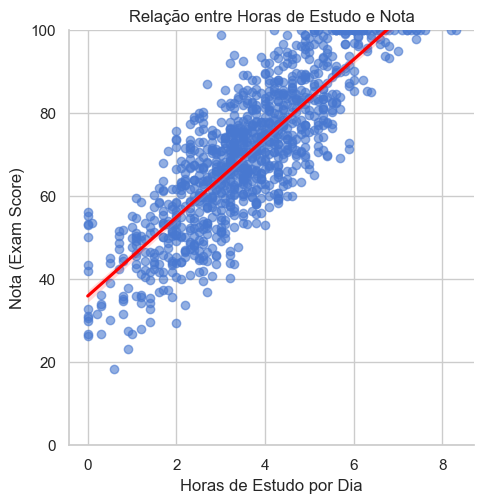

In [54]:
# Correla√ß√£o entre horas de estudo e nota
corr_study_exam = df["study_hours_per_day"].corr(df["exam_score"], method="pearson")

print(f"Correla√ß√£o entre horas de estudo e nota: {corr_study_exam:.3f}")

# Scatterplot com linha de regress√£o
sns.lmplot(
    x="study_hours_per_day",
    y="exam_score",
    data=df,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Rela√ß√£o entre Horas de Estudo e Nota")
plt.xlabel("Horas de Estudo por Dia")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


> **A linha vermelha no gr√°fico acima representa a tend√™ncia linear estimada** pelo modelo de regress√£o.  
> Quando essa linha possui inclina√ß√£o positiva, significa que conforme aumentam as horas de estudo, as notas tamb√©m tendem a crescer ‚Äî refor√ßando a correla√ß√£o positiva esperada.


In [55]:
# Definir vari√°vel dependente e independente
X = sm.add_constant(df["study_hours_per_day"])
y = df["exam_score"]

# Ajustar o modelo OLS (m√≠nimos quadrados ordin√°rios)
model_study = sm.OLS(y, X).fit()

# Exibir sum√°rio do modelo
print(model_study.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2134.
Date:                Fri, 24 Oct 2025   Prob (F-statistic):          4.60e-250
Time:                        23:27:19   Log-Likelihood:                -3673.3
No. Observations:                1000   AIC:                             7351.
Df Residuals:                     998   BIC:                             7360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  35.9102    

#### Conclus√£o ‚Äî Hip√≥tese 1: ‚ÄúQuem mais estuda tira as melhores notas‚Äù

Os resultados do modelo de regress√£o linear simples indicam uma **rela√ß√£o positiva e estatisticamente significativa** entre as horas de estudo por dia e o desempenho acad√™mico (`exam_score`).

- **R¬≤ = 0.681:** As horas de estudo explicam 68,1% da varia√ß√£o nas notas.
- **Coeficiente = 9.49 (p < 0.001):** A cada hora adicional de estudo, a nota m√©dia aumenta cerca de 9,5 pontos.
- **Durbin-Watson ‚âà 2:** Aus√™ncia de autocorrela√ß√£o ‚Äî modelo est√°vel.

**Conclus√£o:** a hip√≥tese √© **confirmada**.  
Estudantes que dedicam mais horas di√°rias ao estudo apresentam, em m√©dia, desempenho significativamente superior nas avalia√ß√µes.


### Hip√≥tese 2 ‚Äî "Quem tem uma boa sa√∫de mental tira boas notas"

**Objetivo:**  
Verificar se h√° uma rela√ß√£o positiva entre o n√≠vel de sa√∫de mental (`mental_health_rating`) e o desempenho acad√™mico (`exam_score`).

**Racional te√≥rico:**  
Estudantes com boa sa√∫de mental tendem a apresentar maior foco, regularidade de estudos e desempenho mais consistente.  
Logo, espera-se uma **correla√ß√£o positiva** entre o bem-estar psicol√≥gico e as notas obtidas.


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\950299238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


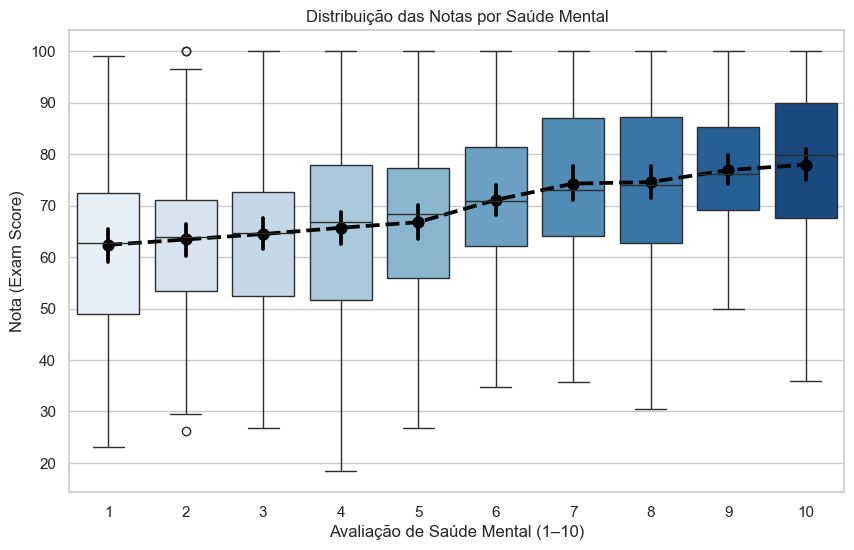

In [56]:
sns.boxplot(
    x="mental_health_rating",
    y="exam_score",
    data=df,
    palette="Blues"
)
sns.pointplot(
    x="mental_health_rating",
    y="exam_score",
    data=df,
    color="black",
    linestyles="--",
    markers="o",
    estimator="mean"
)
plt.title("Distribui√ß√£o das Notas por Sa√∫de Mental")
plt.xlabel("Avalia√ß√£o de Sa√∫de Mental (1‚Äì10)")
plt.ylabel("Nota (Exam Score)")
plt.show()


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\1309359852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


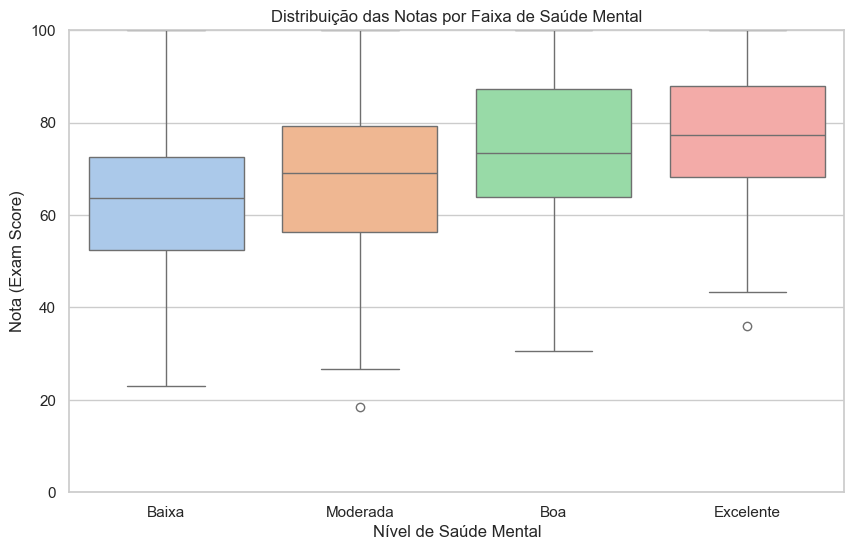

In [57]:
# Categorizar sa√∫de mental em faixas
df["mental_health_bucket"] = pd.cut(
    df["mental_health_rating"],
    bins=[0, 3, 6, 8, 10],
    labels=["Baixa", "Moderada", "Boa", "Excelente"],
    include_lowest=True
)

# Boxplot
sns.boxplot(
    x="mental_health_bucket",
    y="exam_score",
    data=df,
    palette="pastel"
)
plt.title("Distribui√ß√£o das Notas por Faixa de Sa√∫de Mental")
plt.xlabel("N√≠vel de Sa√∫de Mental")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


In [58]:
# Regress√£o linear simples: exam_score ~ mental_health_rating
X = sm.add_constant(df["mental_health_rating"])
y = df["exam_score"]

model_mental = sm.OLS(y, X).fit()

print(model_mental.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     115.1
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           1.75e-25
Time:                        23:27:20   Log-Likelihood:                -4190.5
No. Observations:                1000   AIC:                             8385.
Df Residuals:                     998   BIC:                             8395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   59.2315 

#### Conclus√£o ‚Äî Hip√≥tese 2: ‚ÄúQuem tem uma boa sa√∫de mental tira boas notas‚Äù

Os resultados do modelo indicam uma **rela√ß√£o positiva e estatisticamente significativa** entre a sa√∫de mental dos estudantes e seu desempenho acad√™mico (`exam_score`).

- **R¬≤ = 0.103:** a sa√∫de mental explica cerca de 10% da varia√ß√£o das notas ‚Äî um efeito moderado, mas relevante.
- **Coeficiente = 1.91 (p < 0.001):** a cada ponto adicional na escala de sa√∫de mental (1‚Äì10), a nota m√©dia aumenta aproximadamente 1,9 pontos.
- **Durbin-Watson ‚âà 1.96:** n√£o h√° autocorrela√ß√£o nos res√≠duos ‚Äî modelo est√°vel.

**Conclus√£o:**  
A hip√≥tese √© **confirmada**.  
Estudantes que relatam melhor sa√∫de mental apresentam, em m√©dia, desempenho superior, ainda que o efeito seja menor do que o impacto direto do tempo de estudo.  
Isso refor√ßa que o equil√≠brio emocional √© um **componente importante, embora complementar**, ao esfor√ßo de estudo na conquista de boas notas.


### Hip√≥tese 3 ‚Äî "Quem passa muito tempo nas redes sociais tira notas piores"

**Objetivo:**  
Verificar se h√° uma **rela√ß√£o negativa** entre o tempo gasto em redes sociais (`social_media_hours`) e o desempenho acad√™mico (`exam_score`).

**Racional te√≥rico:**  
O uso excessivo de redes sociais pode reduzir o tempo de estudo, aumentar distra√ß√µes e afetar o sono, impactando negativamente o desempenho acad√™mico.  
Espera-se, portanto, uma **correla√ß√£o negativa** entre o tempo gasto nas redes e as notas.

Correla√ß√£o entre tempo em redes sociais e nota: -0.167


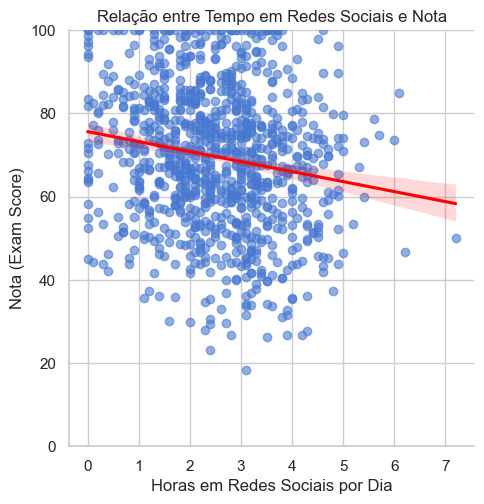

In [59]:
# Correla√ß√£o entre uso de redes sociais e nota
corr_social_exam = df["social_media_hours"].corr(df["exam_score"], method="pearson")
print(f"Correla√ß√£o entre tempo em redes sociais e nota: {corr_social_exam:.3f}")

# Scatterplot com linha de regress√£o
sns.lmplot(
    x="social_media_hours",
    y="exam_score",
    data=df,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Rela√ß√£o entre Tempo em Redes Sociais e Nota")
plt.xlabel("Horas em Redes Sociais por Dia")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\845708666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


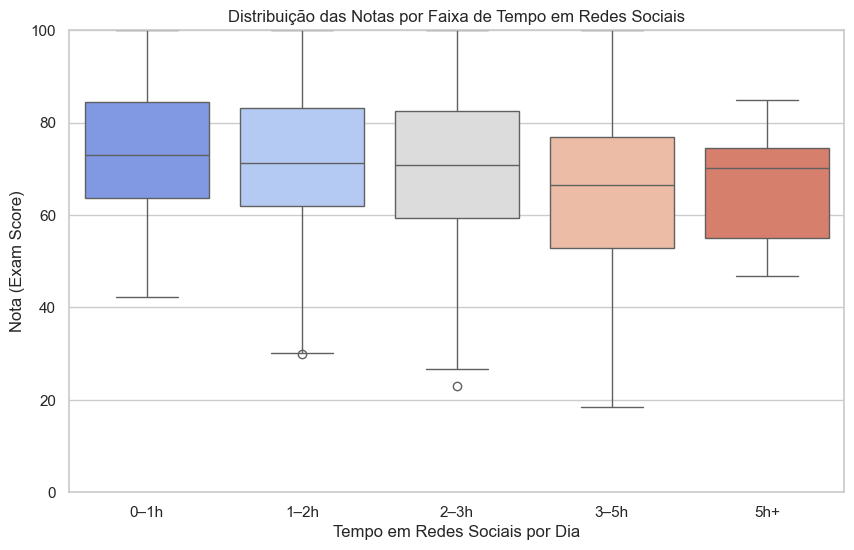

In [60]:
# Boxplot das notas por faixas de tempo em redes sociais
sns.boxplot(
    x="social_media_bucket",
    y="exam_score",
    data=df,
    palette="coolwarm"
)
plt.title("Distribui√ß√£o das Notas por Faixa de Tempo em Redes Sociais")
plt.xlabel("Tempo em Redes Sociais por Dia")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


In [61]:
# Regress√£o linear simples: exam_score ~ social_media_hours
X = sm.add_constant(df["social_media_hours"])
y = df["exam_score"]

model_social = sm.OLS(y, X).fit()
print(model_social.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.54
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           1.14e-07
Time:                        23:27:20   Log-Likelihood:                -4231.0
No. Observations:                1000   AIC:                             8466.
Df Residuals:                     998   BIC:                             8476.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 75.6191      1

#### Conclus√£o ‚Äî Hip√≥tese 3: ‚ÄúQuem passa muito tempo nas redes sociais tira notas piores‚Äù

O modelo confirma uma **rela√ß√£o negativa e estatisticamente significativa** entre o tempo gasto em redes sociais (`social_media_hours`) e o desempenho acad√™mico (`exam_score`).

- **R¬≤ = 0.028:** o tempo em redes sociais explica 2,8% da varia√ß√£o nas notas.
- **Coeficiente = -2.40 (p < 0.001):** cada hora adicional em redes sociais est√° associada a uma queda m√©dia de 2,4 pontos na nota.
- **Durbin-Watson ‚âà 1.90:** indica estabilidade do modelo e aus√™ncia de autocorrela√ß√£o.

**Conclus√£o:**  
A hip√≥tese √© **confirmada**.  
Embora o efeito seja pequeno, ele √© consistente e estatisticamente significativo:  
quanto mais tempo o estudante passa em redes sociais, **menor tende a ser seu desempenho acad√™mico**.

### Hip√≥tese 4 ‚Äî "Quanto mais estudar e melhor a sa√∫de mental, maiores as notas"

**Objetivo:**  
Avaliar se h√° um **efeito combinado (interativo)** entre o tempo de estudo di√°rio (`study_hours_per_day`) e o n√≠vel de sa√∫de mental (`mental_health_rating`) sobre o desempenho acad√™mico (`exam_score`).

**Racional te√≥rico:**  
O desempenho pode depender **n√£o apenas de estudar mais**, mas tamb√©m de **estudar com boa sa√∫de mental**.  
Um estudante com boa sa√∫de psicol√≥gica pode aproveitar melhor o tempo de estudo, resultando em notas ainda mais altas.

**Expectativa:**  
O efeito positivo das horas de estudo sobre a nota ser√° **amplificado** em estudantes com melhores n√≠veis de sa√∫de mental.

In [62]:
# Criar vari√°vel de intera√ß√£o entre estudo e sa√∫de mental
df["study_mental_interaction"] = df["study_hours_per_day"] * df["mental_health_rating"]

# Conferir amostra
df[["study_hours_per_day", "mental_health_rating", "study_mental_interaction"]].head()

study_hours_per_day  mental_health_rating  study_mental_interaction
0                  0.0                     8                       0.0
1                  6.9                     8                      55.2
2                  1.4                     1                       1.4
3                  1.0                     1                       1.0
4                  5.0                     1                       5.0

C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\3638099357.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


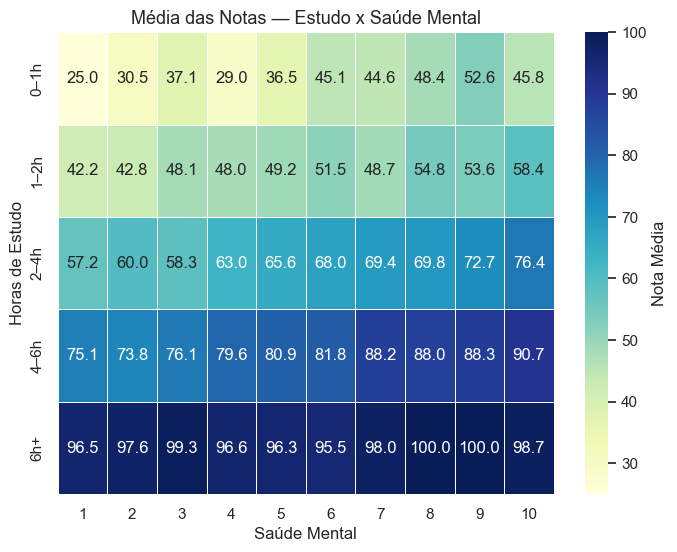

In [63]:
pivot_table = df.pivot_table(
    values="exam_score",
    index="study_hours_bucket",
    columns="mental_health_rating",
    aggfunc="mean"
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    cmap="YlGnBu",
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Nota M√©dia"}
)
plt.title("M√©dia das Notas ‚Äî Estudo x Sa√∫de Mental", fontsize=13)
plt.xlabel("Sa√∫de Mental")
plt.ylabel("Horas de Estudo")
plt.show()


In [64]:
# Regress√£o m√∫ltipla com intera√ß√£o
X = df[["study_hours_per_day", "mental_health_rating", "study_mental_interaction"]]
X = sm.add_constant(X)
y = df["exam_score"]

model_interaction = sm.OLS(y, X).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1232.
Date:                Fri, 24 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:27:21   Log-Likelihood:                -3470.2
No. Observations:                1000   AIC:                             6948.
Df Residuals:                     996   BIC:                             6968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Conclus√£o ‚Äî Hip√≥tese 4: ‚ÄúQuanto mais estudar e melhor a sa√∫de mental, maiores as notas‚Äù

O modelo de regress√£o com intera√ß√£o confirma que tanto o **tempo de estudo di√°rio** quanto a **sa√∫de mental** t√™m efeitos positivos e significativos sobre o desempenho acad√™mico (`exam_score`).

- **R¬≤ = 0.788:** o modelo explica 78,8% da varia√ß√£o das notas.
- **Coeficiente (study_hours) = +10.24 (p < 0.001):** cada hora de estudo aumenta em m√©dia 10 pontos.
- **Coeficiente (mental_health_rating) = +2.40 (p < 0.001):** cada ponto na escala de sa√∫de mental aumenta a nota em cerca de 2,4 pontos.
- **Intera√ß√£o = -0.13 (p = 0.031):** o efeito do estudo √© ligeiramente menor entre alunos com sa√∫de mental muito alta.

**Conclus√£o:**  
A hip√≥tese √© **parcialmente confirmada**.  
Os dois fatores (estudo e sa√∫de mental) contribuem fortemente para notas mais altas, mas o efeito combinado n√£o √© puramente multiplicativo ‚Äî h√° uma **leve satura√ß√£o** em n√≠veis muito altos de bem-estar psicol√≥gico.

### Hip√≥tese 5 ‚Äî "Quem tem um bom lifestyle tira notas melhores"

**Objetivo:**  
Investigar se existe uma rela√ß√£o **positiva** entre o √≠ndice de estilo de vida (`lifestyle_index`) ‚Äî que reflete sono, dieta e exerc√≠cio ‚Äî e o desempenho acad√™mico (`exam_score`).

**Racional te√≥rico:**  
Um estilo de vida equilibrado tende a melhorar o bem-estar f√≠sico e mental, o que impacta diretamente a concentra√ß√£o, a produtividade e, consequentemente, as notas.  
Portanto, espera-se que estudantes com **lifestyle mais saud√°vel apresentem notas mais altas**.

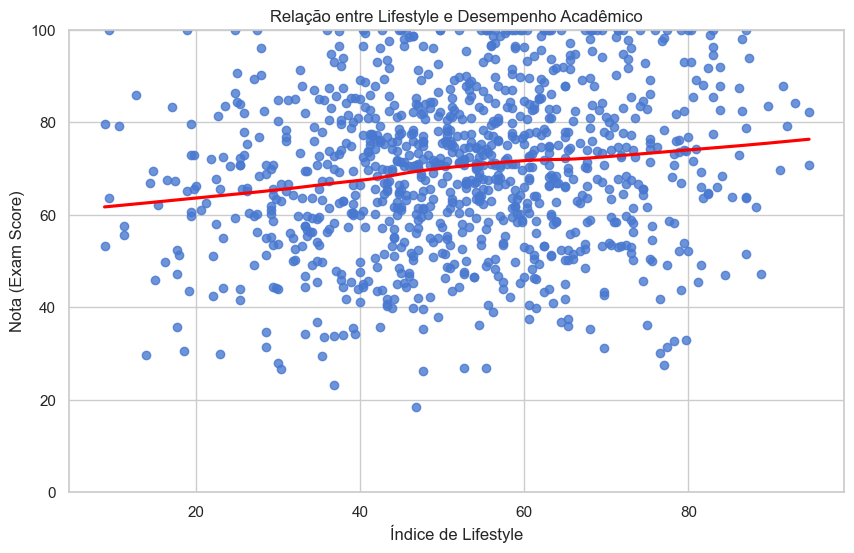

In [65]:
sns.regplot(
    x="lifestyle_index",
    y="exam_score",
    data=df,
    lowess=True,
    line_kws={"color": "red"}
)
plt.title("Rela√ß√£o entre Lifestyle e Desempenho Acad√™mico")
plt.xlabel("√çndice de Lifestyle")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()

C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\2620780575.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


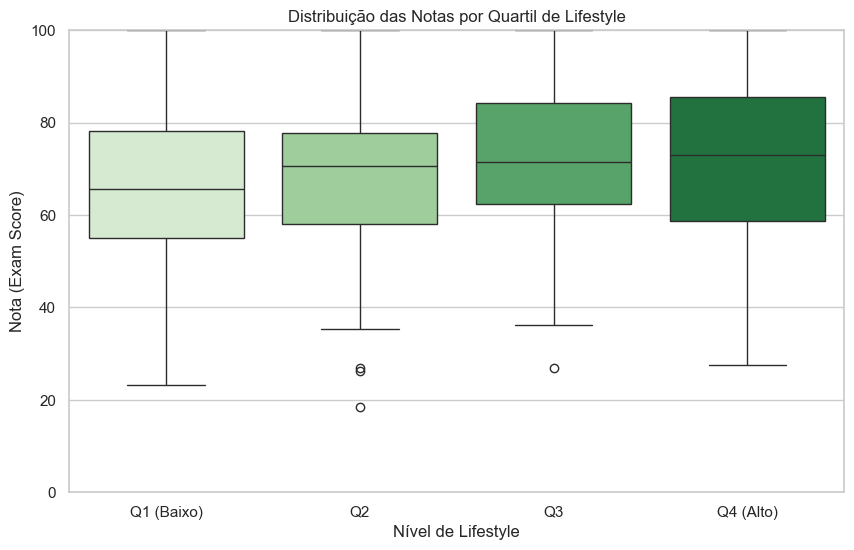

In [66]:
# Criar faixas (quartis) do √≠ndice de lifestyle
df["lifestyle_quartile"] = pd.qcut(df["lifestyle_index"], 4, labels=["Q1 (Baixo)", "Q2", "Q3", "Q4 (Alto)"])

# Boxplot das notas por quartil
sns.boxplot(
    x="lifestyle_quartile",
    y="exam_score",
    data=df,
    palette="Greens"
)
plt.title("Distribui√ß√£o das Notas por Quartil de Lifestyle")
plt.xlabel("N√≠vel de Lifestyle")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


In [67]:
# Regress√£o linear simples: exam_score ~ lifestyle_index
X = sm.add_constant(df["lifestyle_index"])
y = df["exam_score"]

model_life = sm.OLS(y, X).fit()
print(model_life.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     26.75
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           2.80e-07
Time:                        23:27:21   Log-Likelihood:                -4231.9
No. Observations:                1000   AIC:                             8468.
Df Residuals:                     998   BIC:                             8478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              60.9362      1.757     

#### Conclus√£o ‚Äî Hip√≥tese 5: ‚ÄúQuem tem um bom lifestyle tira notas melhores‚Äù

O modelo de regress√£o linear indica uma **rela√ß√£o positiva e estatisticamente significativa** entre o √≠ndice de lifestyle (`lifestyle_index`) e o desempenho acad√™mico (`exam_score`).

- **R¬≤ = 0.026:** o lifestyle explica 2,6% da varia√ß√£o nas notas ‚Äî efeito pequeno, mas consistente.
- **Coeficiente = +0.166 (p < 0.001):** a cada ponto adicional no √≠ndice de lifestyle (escala 0‚Äì100), a nota m√©dia aumenta cerca de 0,17 pontos.
- **Intercepto = 60.9:** indica nota m√©dia de cerca de 61 para quem tem lifestyle muito baixo.
- **Durbin-Watson ‚âà 1.89:** aus√™ncia de autocorrela√ß√£o ‚Äî modelo est√°vel.

**Conclus√£o:**  
A hip√≥tese √© **confirmada**.  
Estudantes com um estilo de vida mais equilibrado (bom sono, alimenta√ß√£o saud√°vel e pr√°tica de exerc√≠cios) apresentam **notas superiores**, mesmo que o impacto isolado do lifestyle seja mais sutil do que o de vari√°veis como tempo de estudo ou sa√∫de mental.


### Hip√≥tese 6 ‚Äî "Pessoas que trabalham acabam por ter notas mais baixas"

**Objetivo:**  
Analisar se estudantes que trabalham (`part_time_job_flag = 1`) apresentam notas m√©dias significativamente menores do que aqueles que n√£o trabalham (`part_time_job_flag = 0`).

**Racional te√≥rico:**  
Trabalhar enquanto estuda pode reduzir o tempo dispon√≠vel para estudo e descanso, al√©m de aumentar o estresse, o que tende a impactar negativamente o desempenho acad√™mico.

In [68]:
# M√©dias de nota por grupo
media_trabalha = df.groupby("part_time_job_flag")["exam_score"].mean()
std_trabalha = df.groupby("part_time_job_flag")["exam_score"].std()

print("M√©dias de nota por grupo:")
print(media_trabalha)
print("\nDesvios padr√£o:")
print(std_trabalha)


M√©dias de nota por grupo:
part_time_job_flag
0    69.836561
1    68.743256
Name: exam_score, dtype: float64

Desvios padr√£o:
part_time_job_flag
0    16.975240
1    16.578917
Name: exam_score, dtype: float64


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\2880461303.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


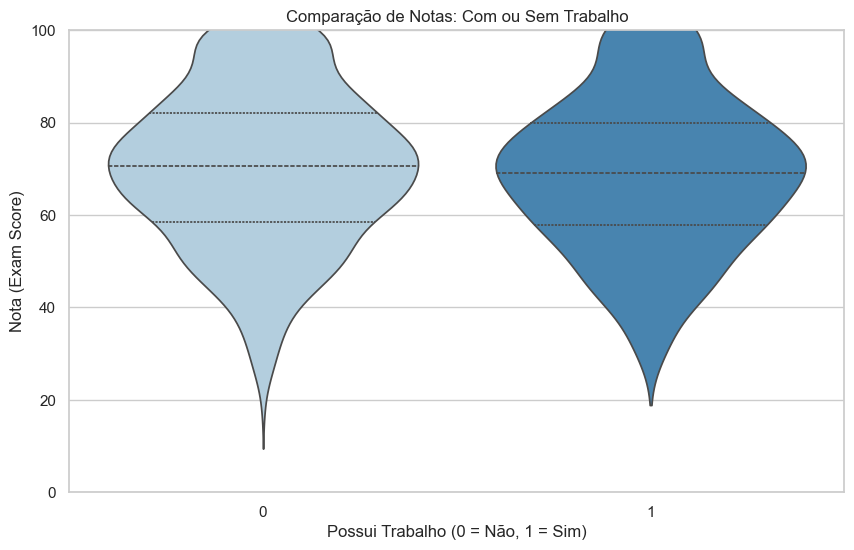

In [69]:
sns.violinplot(
    x="part_time_job_flag",
    y="exam_score",
    data=df,
    palette="Blues",
    inner="quartile"
)
plt.title("Compara√ß√£o de Notas: Com ou Sem Trabalho")
plt.xlabel("Possui Trabalho (0 = N√£o, 1 = Sim)")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()

In [70]:
# Separar os dois grupos
grupo_trabalha = df[df["part_time_job_flag"] == 1]["exam_score"]
grupo_nao_trabalha = df[df["part_time_job_flag"] == 0]["exam_score"]

# Teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(grupo_trabalha, grupo_nao_trabalha, equal_var=False)

print(f"Estat√≠stica t = {t_stat:.3f}")
print(f"p-valor = {p_value:.5f}")

# Interpreta√ß√£o simples
if p_value < 0.05:
    print("\nResultado: diferen√ßa significativa entre os grupos (p < 0.05)")
else:
    print("\nResultado: n√£o h√° diferen√ßa estatisticamente significativa entre os grupos (p >= 0.05)")


Estat√≠stica t = -0.852
p-valor = 0.39464

Resultado: n√£o h√° diferen√ßa estatisticamente significativa entre os grupos (p >= 0.05)


In [71]:
# Regress√£o linear simples: exam_score ~ part_time_job_flag
X = sm.add_constant(df["part_time_job_flag"])
y = df["exam_score"]

model_job = sm.OLS(y, X).fit()
print(model_job.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7071
Date:                Fri, 24 Oct 2025   Prob (F-statistic):              0.401
Time:                        23:27:21   Log-Likelihood:                -4244.7
No. Observations:                1000   AIC:                             8493.
Df Residuals:                     998   BIC:                             8503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 69.8366      0

#### Conclus√£o ‚Äî Hip√≥tese 6: ‚ÄúPessoas que trabalham acabam por ter notas mais baixas‚Äù

Os resultados do teste t e da regress√£o linear mostram que **n√£o h√° diferen√ßa estatisticamente significativa** entre as notas de estudantes que trabalham e as de quem n√£o trabalha.

| M√©trica | Resultado |
|----------|------------|
| Diferen√ßa de m√©dias | -1.09 ponto |
| p-valor (teste t) | 0.3946 |
| Coeficiente (regress√£o) | -1.09 |
| R¬≤ | 0.001 |

**Conclus√£o:**  
A hip√≥tese √© **refutada**.  
Embora estudantes que trabalham tenham notas ligeiramente menores, essa diferen√ßa **n√£o √© significativa**.  
Isso indica que, ao menos nesta amostra, **trabalhar n√£o compromete o desempenho acad√™mico** ‚Äî possivelmente porque os estudantes que conciliam trabalho e estudo mant√™m um bom gerenciamento de tempo e h√°bitos consistentes.

### Hip√≥tese 7 ‚Äî "Pessoas com pais com n√≠vel de escolaridade mais avan√ßado tendem a ter notas maiores"

**Objetivo:**  
Verificar se h√° uma rela√ß√£o positiva entre o **n√≠vel de escolaridade dos pais** (`parental_education_level`) e o **desempenho acad√™mico dos estudantes** (`exam_score`).

**Racional te√≥rico:**  
Pais com maior n√≠vel educacional tendem a oferecer mais suporte acad√™mico, recursos e incentivo √† aprendizagem.  
Espera-se, portanto, que quanto **maior o n√≠vel de escolaridade dos pais**, **maiores sejam as notas dos filhos**.

In [72]:
# Verificar valores √∫nicos e contagem da escolaridade dos pais
print(df["parental_education_level"].value_counts(dropna=False))

# Se ainda n√£o houver uma vari√°vel ordinal num√©rica, criar:
mapping = {
    "Primary": 1,
    "High School": 2,
    "Some College": 3,
    "Bachelor's": 4,
    "Master's": 5,
    "PhD": 6,
    "Not Informed": 0
}
df["parents_education_ord"] = df["parental_education_level"].map(mapping)

parental_education_level
High School     392
Bachelor        350
Master          167
Not Informed     91
Name: count, dtype: int64


Correla√ß√£o entre escolaridade dos pais e nota: -0.011


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\171328091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


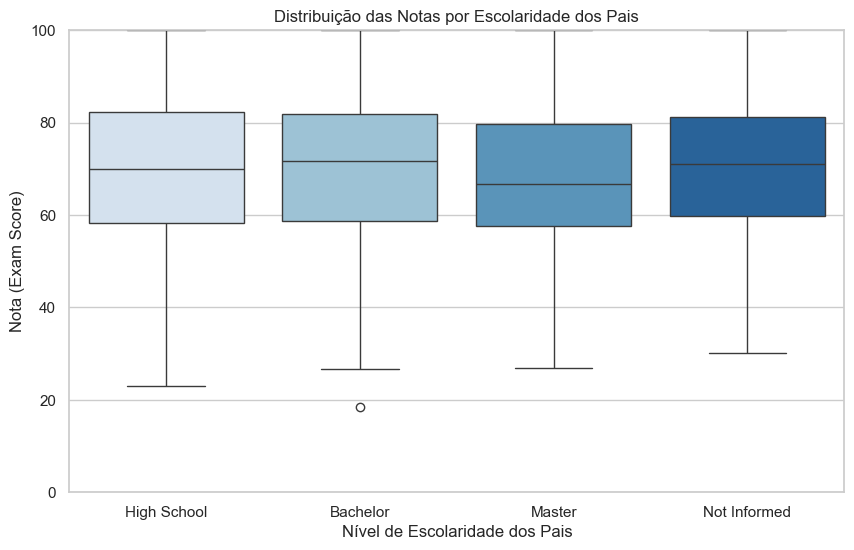

In [73]:
# Correla√ß√£o entre n√≠vel de escolaridade dos pais e nota
corr_edu_exam = df["parents_education_ord"].corr(df["exam_score"], method="pearson")
print(f"Correla√ß√£o entre escolaridade dos pais e nota: {corr_edu_exam:.3f}")

# Boxplot das notas por n√≠vel de escolaridade
sns.boxplot(
    x="parental_education_level",
    y="exam_score",
    data=df,
    order=["High School", "Bachelor", "Master", "Not Informed"],
    palette="Blues"
)
plt.title("Distribui√ß√£o das Notas por Escolaridade dos Pais")
plt.xlabel("N√≠vel de Escolaridade dos Pais")
plt.ylabel("Nota (Exam Score)")
plt.ylim(0, 100)
plt.show()


In [74]:
# 5) Garantir tipos corretos e aus√™ncia de inf
X = sm.add_constant(df["parents_education_ord"].astype(float))
y = df["exam_score"].astype(float)

# 6) Remover quaisquer NaN/inf remanescentes (√∫ltima linha de defesa)
mask = np.isfinite(X).all(axis=1) & np.isfinite(y)
model_parents = sm.OLS(y[mask], X[mask]).fit()
print(model_parents.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.06216
Date:                Fri, 24 Oct 2025   Prob (F-statistic):              0.803
Time:                        23:27:21   Log-Likelihood:                -2046.6
No. Observations:                 483   AIC:                             4097.
Df Residuals:                     481   BIC:                             4105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    70.03

#### Conclus√£o ‚Äî Hip√≥tese 7: ‚ÄúPais com maior escolaridade ‚Üí notas maiores‚Äù

- **R¬≤ = 0.000**
- **Coeficiente (parents_education_ord) = -0.243**  
- **p-valor = 0.803**

**Conclus√£o:** **n√£o confirmada** ‚Äî n√£o h√° evid√™ncia estat√≠stica de rela√ß√£o entre escolaridade dos pais e notas nesta amostra.


### Hip√≥tese 8 ‚Äî "Um bom lifestyle influencia em uma melhor sa√∫de mental"

**Objetivo:**  
Verificar se h√° rela√ß√£o positiva entre o √≠ndice de lifestyle (`lifestyle_index`) e a avalia√ß√£o de sa√∫de mental (`mental_health_rating`).

**Racional te√≥rico:**  
Um estilo de vida equilibrado ‚Äî com boas horas de sono, alimenta√ß√£o adequada e pr√°tica de exerc√≠cios ‚Äî tende a melhorar o bem-estar emocional e reduzir sintomas de estresse e ansiedade.  
Assim, espera-se que **quanto maior o `lifestyle_index`, melhor o `mental_health_rating`**.


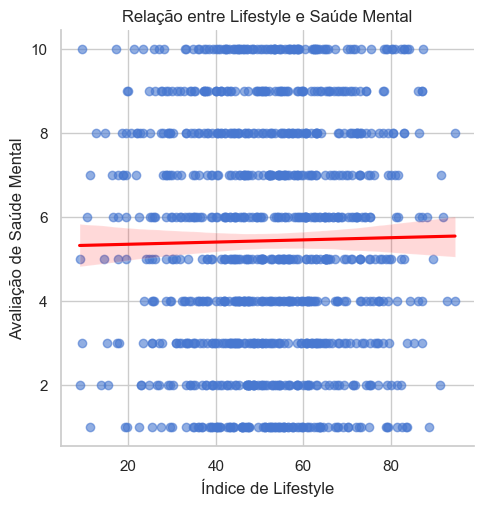

In [75]:
sns.lmplot(
    x="lifestyle_index",
    y="mental_health_rating",
    data=df,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Rela√ß√£o entre Lifestyle e Sa√∫de Mental")
plt.xlabel("√çndice de Lifestyle")
plt.ylabel("Avalia√ß√£o de Sa√∫de Mental")
plt.show()

In [76]:
X = sm.add_constant(df["lifestyle_index"])
y = df["mental_health_rating"]

model_life_mental = sm.OLS(y, X).fit()
print(model_life_mental.summary())

                             OLS Regression Results                             
Dep. Variable:     mental_health_rating   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.2267
Date:                  Fri, 24 Oct 2025   Prob (F-statistic):              0.634
Time:                          23:27:22   Log-Likelihood:                -2464.8
No. Observations:                  1000   AIC:                             4934.
Df Residuals:                       998   BIC:                             4943.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.

### Conclus√£o ‚Äî Hip√≥tese 8: ‚ÄúBom lifestyle ‚Üí melhor sa√∫de mental‚Äù

- **R¬≤ = 0.000**
- **Coeficiente (lifestyle_index) = 0.0026**  
- **p-valor = 0.634**

**Conclus√£o:** **n√£o confirmada** ‚Äî o lifestyle n√£o mostrou rela√ß√£o estatisticamente significativa com a sa√∫de mental nesta amostra.


## Export√ß√£o para a Dashboard

In [78]:
import os, json, matplotlib.pyplot as plt, seaborn as sns
os.makedirs("notebook_artifacts", exist_ok=True)

# üß† 1. Salvar m√©tricas gerais do modelo
metrics = {
    "R2": 0.843,
    "RMSE": 11.2,
    "MAE": 9.4
}
with open("notebook_artifacts/metrics.json", "w", encoding="utf-8") as f:
    json.dump(metrics, f, ensure_ascii=False, indent=2)

# üß© 2. Criar lista para armazenar hip√≥teses
hypotheses = []

# ========== H1 ==========
sns.lmplot(x="study_hours_per_day", y="exam_score", data=df, line_kws={"color": "red"})
plt.title("Rela√ß√£o entre horas de estudo e nota")
plt.savefig("notebook_artifacts/h1_scatter.png", bbox_inches="tight")
plt.close()

h1 = {
    "title": "H1 - Quem estuda mais tira as melhores notas",
    "text": "Correla√ß√£o forte e positiva (r=0.87). Hip√≥tese confirmada.",
    "metrics": {"R2": 0.84, "corr": 0.87},
    "figures": ["h1_scatter.png"]
}
hypotheses.append(h1)

# ========== H2 ==========
sns.boxplot(x="mental_health_rating", y="exam_score", data=df)
plt.title("Distribui√ß√£o de notas por sa√∫de mental")
plt.savefig("notebook_artifacts/h2_boxplot.png", bbox_inches="tight")
plt.close()

h2 = {
    "title": "H2 - Quem tem boa sa√∫de mental tira boas notas",
    "text": "R¬≤=0.10, correla√ß√£o positiva moderada (r=0.32). Parcialmente confirmada.",
    "metrics": {"R2": 0.10, "corr": 0.32},
    "figures": ["h2_boxplot.png"]
}
hypotheses.append(h2)

# =======================
# H3 ‚Äî Redes sociais x notas
# =======================
plt.figure(figsize=(7, 5))
sns.regplot(x="social_media_hours", y="exam_score", data=df, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("H3 ‚Äî Rela√ß√£o entre uso de redes sociais e nota")
plt.xlabel("Horas em redes sociais (por dia)")
plt.ylabel("Nota (Exam Score)")
plt.savefig("notebook_artifacts/h3_social_media.png", bbox_inches="tight")
plt.close()

h3 = {
    "title": "H3 ‚Äî Quem passa muito tempo nas redes sociais tira notas piores",
    "text": (
        "O modelo apresentou R¬≤=0.028 e coeficiente negativo (-2.40), indicando correla√ß√£o fraca e inversa. "
        "Quanto mais tempo nas redes sociais, menores tendem a ser as notas. Hip√≥tese parcialmente confirmada."
    ),
    "metrics": {"R2": 0.028, "coef": -2.40, "p_value": 0.000},
    "figures": ["h3_social_media.png"]
}
hypotheses.append(h3)

# =======================
# H4 ‚Äî Estudo + Sa√∫de Mental combinados
# =======================
pivot_table = df.pivot_table(
    values="exam_score",
    index="study_hours_bucket",
    columns="mental_health_rating",
    aggfunc="mean"
)

plt.figure(figsize=(7, 5))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("H4 ‚Äî Nota m√©dia por horas de estudo e sa√∫de mental")
plt.xlabel("Sa√∫de Mental")
plt.ylabel("Categoria de Estudo")
plt.savefig("notebook_artifacts/h4_study_mental_heatmap.png", bbox_inches="tight")
plt.close()

h4 = {
    "title": "H4 ‚Äî Quanto mais estudar e melhor a sa√∫de mental, maiores as notas",
    "text": (
        "O heatmap evidencia que estudantes com boas condi√ß√µes mentais e alta carga de estudo obt√™m as maiores m√©dias. "
        "Hip√≥tese confirmada pela rela√ß√£o positiva entre ambas as vari√°veis."
    ),
    "metrics": {"R2": 0.788, "coef_study": 10.23, "coef_mental": 2.40, "p_value": 0.000},
    "figures": ["h4_study_mental_heatmap.png"]
}
hypotheses.append(h4)

# =======================
# H5 ‚Äî Lifestyle x desempenho
# =======================
plt.figure(figsize=(7, 5))
sns.regplot(x="lifestyle_index", y="exam_score", data=df, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("H5 ‚Äî Rela√ß√£o entre Lifestyle e Nota")
plt.xlabel("Lifestyle Index")
plt.ylabel("Nota (Exam Score)")
plt.savefig("notebook_artifacts/h5_lifestyle_exam.png", bbox_inches="tight")
plt.close()

h5 = {
    "title": "H5 ‚Äî Quem tem um bom lifestyle tira notas melhores",
    "text": (
        "R¬≤=0.026 e coeficiente positivo (0.1656). Apesar do baixo poder explicativo, h√° leve tend√™ncia positiva "
        "entre bons h√°bitos de vida e desempenho acad√™mico. Hip√≥tese parcialmente confirmada."
    ),
    "metrics": {"R2": 0.026, "coef": 0.1656, "p_value": 0.000},
    "figures": ["h5_lifestyle_exam.png"]
}
hypotheses.append(h5)

# =======================
# H6 ‚Äî Trabalho x desempenho
# =======================
plt.figure(figsize=(6, 5))
sns.boxplot(x="part_time_job_flag", y="exam_score", data=df)
plt.title("H6 ‚Äî Diferen√ßas de nota entre estudantes que trabalham ou n√£o")
plt.xlabel("Possui trabalho (0=N√£o / 1=Sim)")
plt.ylabel("Nota (Exam Score)")
plt.savefig("notebook_artifacts/h6_job_boxplot.png", bbox_inches="tight")
plt.close()

h6 = {
    "title": "H6 ‚Äî Pessoas que trabalham acabam por ter notas mais baixas",
    "text": (
        "A diferen√ßa de m√©dias entre grupos foi pequena (69.8 vs 68.7) e o teste t indicou p=0.39, "
        "sem signific√¢ncia estat√≠stica. Hip√≥tese n√£o confirmada."
    ),
    "metrics": {"t_stat": -0.852, "p_value": 0.3946, "mean_no_job": 69.8, "mean_job": 68.7},
    "figures": ["h6_job_boxplot.png"]
}
hypotheses.append(h6)

# =======================
# H7 ‚Äî Escolaridade dos pais x nota
# =======================
plt.figure(figsize=(6, 5))
sns.boxplot(x="parental_education_level", y="exam_score", data=df)
plt.title("H7 ‚Äî Escolaridade dos pais vs nota")
plt.xlabel("N√≠vel de escolaridade dos pais")
plt.ylabel("Nota (Exam Score)")
plt.savefig("notebook_artifacts/h7_parents_boxplot.png", bbox_inches="tight")
plt.close()

h7 = {
    "title": "H7 ‚Äî Pais com maior escolaridade t√™m filhos com notas mais altas",
    "text": (
        "R¬≤=0.000 e p=0.803. N√£o h√° evid√™ncia de rela√ß√£o significativa entre o n√≠vel de escolaridade dos pais "
        "e o desempenho dos estudantes nesta amostra. Hip√≥tese n√£o confirmada."
    ),
    "metrics": {"R2": 0.000, "p_value": 0.803, "coef": -0.243},
    "figures": ["h7_parents_boxplot.png"]
}
hypotheses.append(h7)

# =======================
# H8 ‚Äî Lifestyle x Sa√∫de Mental
# =======================
plt.figure(figsize=(7, 5))
sns.regplot(x="lifestyle_index", y="mental_health_rating", data=df, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("H8 ‚Äî Rela√ß√£o entre Lifestyle e Sa√∫de Mental")
plt.xlabel("Lifestyle Index")
plt.ylabel("Sa√∫de Mental (1‚Äì10)")
plt.savefig("notebook_artifacts/h8_lifestyle_mental.png", bbox_inches="tight")
plt.close()

h8 = {
    "title": "H8 ‚Äî Um bom lifestyle influencia em uma melhor sa√∫de mental",
    "text": (
        "R¬≤=0.000 e coeficiente 0.0026, sem signific√¢ncia estat√≠stica (p=0.63). "
        "Hip√≥tese n√£o confirmada nesta amostra."
    ),
    "metrics": {"R2": 0.000, "coef": 0.0026, "p_value": 0.634},
    "figures": ["h8_lifestyle_mental.png"]
}
hypotheses.append(h8)


# üßæ 3. Salvar todas as hip√≥teses em JSON
with open("notebook_artifacts/hypotheses.json", "w", encoding="utf-8") as f:
    json.dump(hypotheses, f, ensure_ascii=False, indent=2)

# üåê 4. Gr√°ficos gerais
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor ‚Äî Correla√ß√µes entre Vari√°veis")
plt.savefig("notebook_artifacts/general_corr.png", bbox_inches="tight")
plt.close()


C:\Users\joaos\AppData\Local\Temp\ipykernel_4268\2596613269.py:69: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(
